In [1]:
# from tensorflow import keras
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn
import numpy as np
import seaborn as sn
import os
import cv2
import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
tf.config.list_physical_devices('GPU')

[]

1.REMOVE USELESS FILE TYPES 

In [3]:
import os
import cv2
import imghdr

from pathlib import Path

# data_dir = Path(r"C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\ImageClassification")
data_dir = Path(r"C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_DL_Image_HAppy_Sad\\data")
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    class_dir = data_dir / image_class
    if class_dir.is_dir():  # Upewnij się, że ścieżka jest katalogiem
        for image in os.listdir(class_dir):
            image_path = class_dir / image
            try:
                img = cv2.imread(str(image_path))  # Konwertuj na str, ponieważ pathlib.Path nie jest obsługiwany bezpośrednio przez cv2.imread()
                tip = imghdr.what(str(image_path))  # Konwertuj na str
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(str(image_path))
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(str(image_path))  # Jeśli chcesz usuwać pliki, odkomentuj tę linię


2.LOAD DATA

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')#ładujemy dane i ustawiamy je w klasach zaleznych od folderow

Found 140 files belonging to 2 classes.


In [5]:
data_iterator =data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
batch[1]#0 i 1 reprezentuja jedna z klas happy czy sad

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

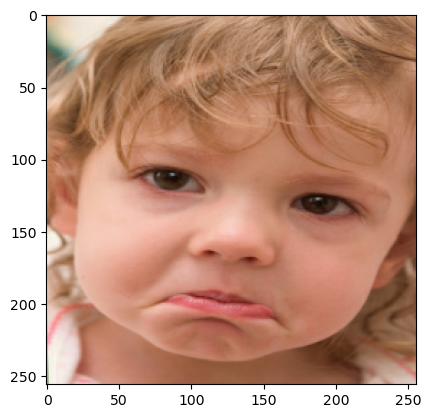

In [8]:

img  = batch[0][5]# z tego wiem ze jedynki oznaczaja klase sad: 1==SAD
plt.imshow(img.astype(int))

Wgranie zdjecia

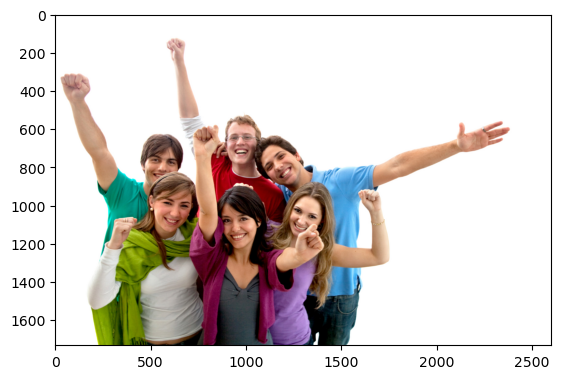

In [9]:
img = cv2.imread("C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_DL_Image_HAppy_Sad\\data\\happy\\8cxKy5g9i.jpg")
img.shape
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

3.Preprocess DATA

Scale data

In [10]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()


In [11]:
batch = scaled_iterator.next()
# batch

In [12]:
batch[0].min()

0.0

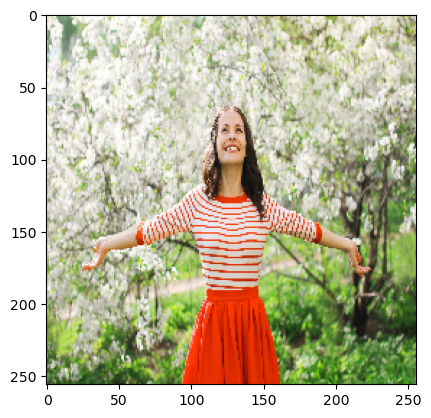

In [13]:
img  = batch[0][5]# z tego wiem ze jedynki oznaczaja klase sad: 1==SAD

plt.imshow(img)


4.SPLIT DATA FOR TRAINING

In [14]:
a = len(data)
a

5

In [15]:
train_size = int(a*0.7)
train_size

3

In [16]:
valid_size = int(a*0.2)
valid_size

1

In [17]:
test_size = int(a*0.1)+1
test_size

1

In [18]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size).take(test_size)

In [19]:
len(test)

1

5.BUILD DEEP LEARNING MODEL

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
#na pierwszej warstwie mamy warstwe input, wartosc 16 mowi o ilosci filtrów wzgledem jakich oceniany jest obraz (3,3) okno do sprawdzania
# 1 mowi o przeskakiwaniu okna o jeden pixel, aktywacja relu usuwa wartosci mniejsze od 0 a wieksze zostawia bez zmian
# Conv2D(ilosc filtrow, wielkosc okna do filtrowania, skok okna, funkcja aktywacyjna)
#funkcja MaxPooling2D zmniejsza ilosc informacji ze zdjecia
model.add(Conv2D(16,(3,3),1,activation ='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

# model.add(Conv2D(32,(3,3),1,activation ='relu'))
# model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation ='relu'))
model.add(MaxPooling2D())

#przed warstwa wyjsciowa dodajemy splaszczenie naszej funkcji
model.add(Flatten())

model.add(Dense(256,activation ='relu'))
#dostaniemy dzieki funkcji sigmoid 0 albo 1, jesli 0 to HAPPY jesli 1 to SAD
model.add(Dense(1,activation = 'sigmoid'))

In [23]:
#adam to optimizer funkcja strat w tym przypadku jest binarycrossentropy bo 2 klasy i interesuje nas dokladnosc
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 256)               1

6.TRAIN MODEL

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [27]:
hist = model.fit(train,epochs=18,validation_data=valid,callbacks=[tensorboard_callback])

Epoch 1/18


3/3 [==============================] - 4s 918ms/step - loss: 3.3121 - accuracy: 0.4896 - val_loss: 0.8927 - val_accuracy: 0.6250
Epoch 2/18
3/3 [==============================] - 3s 824ms/step - loss: 0.6936 - accuracy: 0.6354 - val_loss: 0.4233 - val_accuracy: 0.8438
Epoch 3/18
3/3 [==============================] - 3s 832ms/step - loss: 0.4408 - accuracy: 0.7812 - val_loss: 0.3681 - val_accuracy: 0.8438
Epoch 4/18
3/3 [==============================] - 3s 841ms/step - loss: 0.3103 - accuracy: 0.8958 - val_loss: 0.2798 - val_accuracy: 0.9062
Epoch 5/18
3/3 [==============================] - 3s 831ms/step - loss: 0.2516 - accuracy: 0.9062 - val_loss: 0.1058 - val_accuracy: 1.0000
Epoch 6/18
3/3 [==============================] - 3s 846ms/step - loss: 0.2164 - accuracy: 0.9062 - val_loss: 0.1118 - val_accuracy: 0.9688
Epoch 7/18
3/3 [==============================] - 3s 811ms/step - loss: 0.1745 - accuracy: 0.9688 - val_loss: 0.1481 - val_accuracy: 0.9375
Epoch 8/18
3/3 [===============

In [28]:
# hist.history

7.PLOT PERFORMANCE

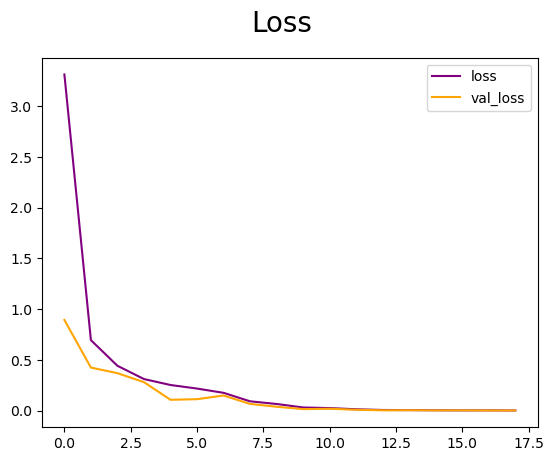

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='purple',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend()
plt.show()


8.EVALUETE

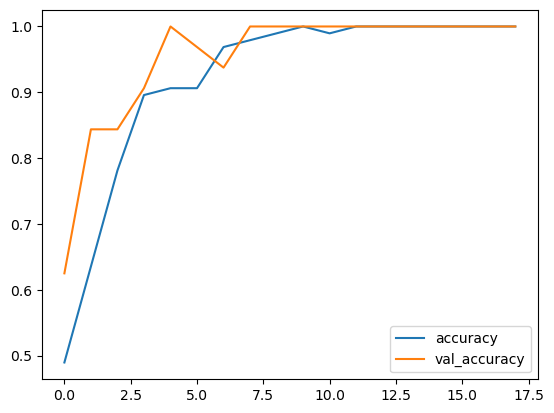

In [30]:
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
fig.suptitle("Acurracy",fontsize=20)
plt.legend()
plt.show()

9. EVALUETE

In [31]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)



1/1 [==============================] - 0s 156ms/step


In [34]:
print('Precision',pre.result().numpy(),'Recall',re.result().numpy(),'Accuracy',acc.result().numpy())

Precision 1.0 Recall 1.0 Accuracy 1.0


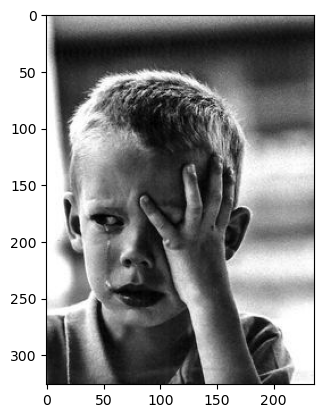

In [35]:
import cv2
# img = cv2.imread('friends-happy-190821-800x450.jpg')
# img = cv2.imread('deg.jpg')
img = cv2.imread('boy_sad__.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

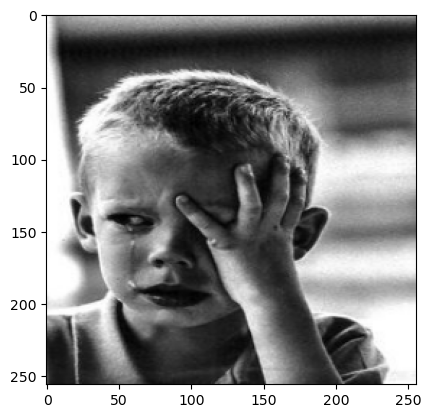

In [36]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
np.expand_dims(resize,0)#wrzucamy to w kolejna tablice

array([[[[252.41016 , 252.41016 , 252.41016 ],
         [246.10977 , 246.10977 , 246.10977 ],
         [235.17712 , 235.17712 , 235.17712 ],
         ...,
         [155.59048 , 155.59048 , 155.59048 ],
         [155.61832 , 155.61832 , 155.61832 ],
         [162.71875 , 162.71875 , 162.71875 ]],

        [[255.      , 255.      , 255.      ],
         [248.29959 , 248.29959 , 248.29959 ],
         [233.87506 , 233.87506 , 233.87506 ],
         ...,
         [143.08978 , 143.08978 , 143.08978 ],
         [140.67017 , 140.67017 , 140.67017 ],
         [139.53906 , 139.53906 , 139.53906 ]],

        [[255.      , 255.      , 255.      ],
         [248.82031 , 248.82031 , 248.82031 ],
         [234.61578 , 234.61578 , 234.61578 ],
         ...,
         [133.86469 , 133.86469 , 133.86469 ],
         [130.80264 , 130.80264 , 130.80264 ],
         [123.69531 , 123.69531 , 123.69531 ]],

        ...,

        [[ 84.36719 ,  84.36719 ,  84.36719 ],
         [ 64.0625  ,  64.0625  ,  64.0625  ]

In [38]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [39]:
yhat

array([[0.99187505]], dtype=float32)

In [40]:
if yhat >0.5:
    print('Picture is sad')
else:
    print('Picture is happy')

Picture is sad


In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','happy_sad_model.h5'))
new_model = load_model(os.path.join('models','happy_sad_model.h5'))

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 48ms/step


In [ ]:
if yhat >0.55:
    print('Picture is sad',yhat)
elif yhat >0.45 and yhat <0.55:
    print('Im not sure',yhat)
else:
    print('Picture is happy',yhat)

Picture is sad [[0.55817133]]
